<div style="width:100%; height:140px">
    <img src="https://www.kuleuven.be/internationaal/thinktank/fotos-en-logos/ku-leuven-logo.png/image_preview" width = 300px, heigh = auto align=left>
</div>


KUL H02A5a Computer Vision: Group Assignment 2
---------------------------------------------------------------
Student numbers: <span style="color:red"></span>. (fill in your student numbers!)

In this group assignment your team will delve into some deep learning applications for computer vision. The assignment will be delivered in the same groups from *Group assignment 1* and you start from this template notebook. The notebook you submit for grading is the last notebook you submit in the [Kaggle competition](https://www.kaggle.com/t/d11be6a431b84198bc85f54ae7e2563f) prior to the deadline on **Tuesday 24 May 23:59**. Closely follow [these instructions](https://github.com/gourie/kaggle_inclass) for joining the competition, sharing your notebook with the TAs and making a valid notebook submission to the competition. A notebook submission not only produces a *submission.csv* file that is used to calculate your competition score, it also runs the entire notebook and saves its output as if it were a report. This way it becomes an all-in-one-place document for the TAs to review. As such, please make sure that your final submission notebook is self-contained and fully documented (e.g. provide strong arguments for the design choices that you make). Most likely, this notebook format is not appropriate to run all your experiments at submission time (e.g. the training of CNNs is a memory hungry and time consuming process; due to limited Kaggle resources). It can be a good idea to distribute your code otherwise and only summarize your findings, together with your final predictions, in the submission notebook. For example, you can substitute experiments with some text and figures that you have produced "offline" (e.g. learning curves and results on your internal validation set or even the test set for different architectures, pre-processing pipelines, etc). We advise you to first go through the PDF of this assignment entirely before you really start. Then, it can be a good idea to go through this notebook and use it as your first notebook submission to the competition. You can make use of the *Group assignment 2* forum/discussion board on Toledo if you have any questions. Good luck and have fun!

---------------------------------------------------------------
NOTES:
* This notebook is just a template. Please keep the five main sections, but feel free to adjust further in any way you please!
* Clearly indicate the improvements that you make! You can for instance use subsections like: *3.1. Improvement: applying loss function f instead of g*.


# 1. Overview
This assignment consists of *three main parts* for which we expect you to provide code and extensive documentation in the notebook:
* Image classification (Sect. 2)
* Semantic segmentation (Sect. 3)
* Adversarial attacks (Sect. 4)

In the first part, you will train an end-to-end neural network for image classification. In the second part, you will do the same for semantic segmentation. For these two tasks we expect you to put a significant effort into optimizing performance and as such competing with fellow students via the Kaggle competition. In the third part, you will try to find and exploit the weaknesses of your classification and/or segmentation network. For the latter there is no competition format, but we do expect you to put significant effort in achieving good performance on the self-posed goal for that part. Finally, we ask you to reflect and produce an overall discussion with links to the lectures and "real world" computer vision (Sect. 5). It is important to note that only a small part of the grade will reflect the actual performance of your networks. However, we do expect all things to work! In general, we will evaluate the correctness of your approach and your understanding of what you have done that you demonstrate in the descriptions and discussions in the final notebook.

## 1.1 Deep learning resources
If you did not yet explore this in *Group assignment 1 (Sect. 2)*, we recommend using the TensorFlow and/or Keras library for building deep learning models. You can find a nice crash course [here](https://colab.research.google.com/drive/1UCJt8EYjlzCs1H1d1X0iDGYJsHKwu-NO).

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
!pip install tensorflow_addons

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Activation, Dense, Dropout, Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, History, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from tensorflow.keras.losses import CategoricalCrossentropy

from sklearn.model_selection import train_test_split
import cv2

In [ ]:
!pip install gdown
!gdown 1o7VM68dIy7hOE13KIiEJqXaGrQMu7HrR
!gdown 1pAjtXqBuUDWpx0RJ6aPNKHZN6Mo2Hbqo
!gdown 1or8z6XAv36nn51McBI-dE4koT2w3PVvp
!gdown 1pIU3_mGpBqN3sGq3hegBy-G_iVIrfdQd
!gdown 1pflpnEPjkhgEx1Yq5DHdsc9KVZnpf0fJ
!gdown 1pgJHVruu1SNyMz6uuKbT_vVQJL0EFxEF --folder 
!gdown 1pw6Wn8tfEK3CkSzwHptnwPKalsGLWy6f
!gdown 1vjt5JGiDzMjkBh_Jb7AgpY4nLG1-uAAK # mobilenet model
!gdown 1Rl4vu6W_5jVO6WxpQF05MH1s2hfyHDBS # mobilenet history 
!gdown 12tWpLCtgdocvgn0C1Qhw-slvdd70pbps # early stopping resnet epoch 150 history
!gdown 1vRkkr9WLrf9tM5CnlOFwZf6aoLSeIFQc # early stopping resnet epoch 150 model
!gdown 1yN3amgPuzIUODbEv7Qiv6LOwUPCA95LJ # resnet epoch 150 history
!gdown 1js70hBwhh1oGYiGBRFCsiOetD0BETmyO # resnet epoch 150 model
!gdown 10C87YU7pSh4k9MwFBmtL15c90qkor2Vs # mobilenet epoch 150 model
!gdown 1-pG6uEmnyXPLQOgcp_-JIr698SRb7hHe # mobilenet epoch 150 history
!gdown 1726Zg3tJV7uBBwwHYwZ-OHGO6KqnuD4G # early stop mobilenet epoch 150 history
!gdown 1_Rgi7qrLaWa13FVjKR2IDij27kM9zHnx # early stop mobilenet epoch 150 model

In [ ]:
train_CNN = False    # Set to True to retrain the models, if set to False pre-trained models will be downloaded and imported
from numpy.random import seed 
seed(42) # keras seed fixing import
tf.random.set_seed(42) # tensorflow seed fixing

## 1.2 PASCAL VOC 2009
For this project you will be using the [PASCAL VOC 2009](http://host.robots.ox.ac.uk/pascal/VOC/voc2009/index.html) dataset. This dataset consists of colour images of various scenes with different object classes (e.g. animal: *bird, cat, ...*; vehicle: *aeroplane, bicycle, ...*), totalling 20 classes.

In [ ]:
# Loading the training data
train_df = pd.read_csv('/kaggle/input/kul-h02a5a-computer-vision-ga2-2022/train/train_set.csv', index_col="Id")
labels = train_df.columns
train_df["img"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2022/train/img/train_{}.npy'.format(idx)) for idx, _ in train_df.iterrows()]
train_df["seg"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2022/train/seg/train_{}.npy'.format(idx)) for idx, _ in train_df.iterrows()]
print("The training set contains {} examples.".format(len(train_df)))

# Show some examples
fig, axs = plt.subplots(2, 20, figsize=(10 * 20, 10 * 2))
for i, label in enumerate(labels):
    df = train_df.loc[train_df[label] == 1]
    axs[0, i].imshow(df.iloc[0]["img"], vmin=0, vmax=255)
    axs[0, i].set_title("\n".join(label for label in labels if df.iloc[0][label] == 1), fontsize=40)
    axs[0, i].axis("off")
    axs[1, i].imshow(df.iloc[0]["seg"], vmin=0, vmax=20)  # with the absolute color scale it will be clear that the arrays in the "seg" column are label maps (labels in [0, 20])
    axs[1, i].axis("off")
    
plt.show()

# The training dataframe contains for each image 20 columns with the ground truth classification labels and 20 column with the ground truth segmentation maps for each class
train_df.head(1)

In [ ]:
# Loading the test data
test_df = pd.read_csv('/kaggle/input/kul-h02a5a-computer-vision-ga2-2022/test/test_set.csv', index_col="Id")
test_df["img"] = [np.load('/kaggle/input/kul-h02a5a-computer-vision-ga2-2022/test/img/test_{}.npy'.format(idx)) for idx, _ in test_df.iterrows()]
test_df["seg"] = [-1 * np.ones(img.shape[:2], dtype=np.int8) for img in test_df["img"]]
print("The test set contains {} examples.".format(len(test_df)))

# The test dataframe is similar to the training dataframe, but here the values are -1 --> your task is to fill in these as good as possible in Sect. 2 and Sect. 3; in Sect. 6 this dataframe is automatically transformed in the submission CSV!
test_df.head(1)

## 1.3 Your Kaggle submission
Your filled test dataframe (during Sect. 2 and Sect. 3) must be converted to a submission.csv with two rows per example (one for classification and one for segmentation) and with only a single prediction column (the multi-class/label predictions running length encoded). You don't need to edit this section. Just make sure to call this function at the right position in this notebook.

In [ ]:
def _rle_encode(img):
    """
    Kaggle requires RLE encoded predictions for computation of the Dice score (https://www.kaggle.com/lifa08/run-length-encode-and-decode)

    Parameters
    ----------
    img: np.ndarray - binary img array
    
    Returns
    -------
    rle: String - running length encoded version of img
    """
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    rle = ' '.join(str(x) for x in runs)
    return rle

def generate_submission(df):
    """
    Make sure to call this function once after you completed Sect. 2 and Sect. 3! It transforms and writes your test dataframe into a submission.csv file.
    
    Parameters
    ----------
    df: pd.DataFrame - filled dataframe that needs to be converted
    
    Returns
    -------
    submission_df: pd.DataFrame - df in submission format.
    """
    df_dict = {"Id": [], "Predicted": []}
    for idx, _ in df.iterrows():
        df_dict["Id"].append(f"{idx}_classification")
        df_dict["Predicted"].append(_rle_encode(np.array(df.loc[idx, labels])))
        df_dict["Id"].append(f"{idx}_segmentation")
        df_dict["Predicted"].append(_rle_encode(np.array([df.loc[idx, "seg"] == j + 1 for j in range(len(labels))])))
    
    submission_df = pd.DataFrame(data=df_dict, dtype=str).set_index("Id")
    submission_df.to_csv("submission.csv")
    return submission_df

## 1.4 Introduction to CNN

In the following section an introduction to convolutional neural networks will be provided to set the scene. CNN is a deep learning technique that uses the concept of local connectivity. If we apply this on images for example it is likely that pixels that are located close to each other represent the same part of the image, e.g., the nose, ears, mouth of a person. Using large databases containing diverse pictures, CNN’s can learn rich feature representations for a wide range of images. Hence, these representations often outperform hand-crafted features such as HOG, LBP, SURF... An efficient way to utilize the power of these networks without putting too much time and effort into the training phase, a pretrained CNN can be used by means of transfer learning.

In fact, CNNs are a subgroup of neural networks as they posses all the typical characteristics. Compared to other architectures, CNNs are usable only for images as input. In the main part of the architecture, part 1, the features from the picture are extracted. This is done by using convolutional layers, meaning that convolutional filters are applied to the input image. Every single filter will scan the picture looking for specific features. In the early phase, these features will not have a lot of meaning, e.g., dots, lines, circles. Later in the model these features will be more informative, e.g., nose, ears, mouth… After applying these techniques, together with other layers that will be discussed further, the output will be used for classification purposes. The latter is not specific for the CNNs; however, it is applied in all the neural networks used for classification. 

In part 2, this classification takes place using fully connected layers. These layers are obtained after applying several techniques on the input including various linear combinations and activation functions. The output will be a vector that can be used as input for the activation function. There are multiple choices for the activation function, often the sigmoid or softmax function are utilized, which will be discussed next. 

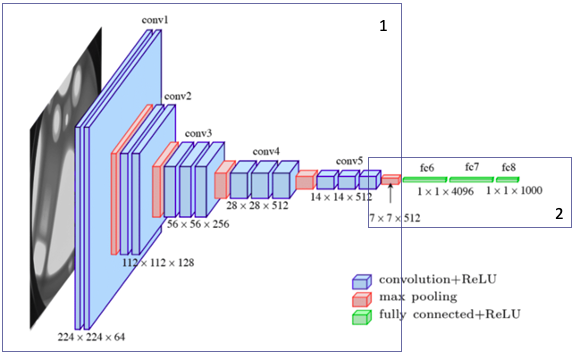

### 1.4.1 Layers explained

**Convolutional layer**: key component of the CNNs, this layer is always introduced as first layer. The kernel or the filter that is of the form of a matrix, representing the feature on the image will scan over the image. These filters correspond exactly to the features and characteristics we want to see in the images. Hence, it calculates the convolution product between the feature and the portion of the picture it is scanning over. In the end, a feature map will be obtained for each feature telling us where exactly we can find it in the input image. 

**Pooling layer**: often placed between two convolutional layers. It takes as input the resulting feature maps as discussed above and hence applies a pooling operation on them. The goal of this layer is to reduce the size of the image while retaining their important characteristics. In other words, it will realize a reduction in the number of parameters and calculations in the network. Result: improve efficiency of the network and avoid overfitting the training data.

**ReLU (correction layer)**: it acts as an non-linear activation function that will replace all negative values of the inputs by zeros. ReLU(x) = max(0,x). Visualized, it looks like this:

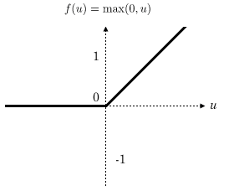

The aim of this layer is to improve the learning efficiency. 

**Fully-connected layer**: this one is always the last layer of the CNN. It takes as input a vector and produces a new output vector. This is done by applying a linear combination and then an activation function. The final output will be a vector containing n elements, where n is the number of possible classes. To calculate the probabilities for each of these classes, first the weights connected to each of the elements in the vector is multiplied by the value for that element in the vector. Next, an activation function is applied, this can be a sigmoid or softmax function. When these probabilities are not correct, a loss will be computed and hence, using backpropagation of the gradient, the weights will be updated. 

**The Sigmoid Activation Function** is a mathematical function with a recognizable “S” shaped curve and is best suited for binary classification. This function will be applied to each element of the raw output independently, on the last fully connected layer, discussed above. The return value of Sigmoid Function is mostly in the range of values between 0 and 1 or -1 and 1. Hence, the **Softmax Activation Function** is a mathematical way to convert a vector of real numbers (input) to a probability distribution proportional to the exponentials of these input numbers. This is done by means of normalization. In general, the softmax function is merely used for multi class classification, the type we are dealing with in this assignment.

**Dropout layer**: this layer can be used multiple times in the architecture, often between convolutional layers. The aim of this layer is to nullify the contribution of some of the incoming neurons towards the next layer without affecting the other ones. This layer is applicable to the input vector, however, also to a hidden layer. These dropout layers are important as they function as a kind of regularization to prevent the network from overfitting the training data. When these are not used, the first batch of the training data will influence the learning in a disproportionately high manner. The dropout layer required a number x between 0 and 1 and this indicates the portion of the neurons that will be dropped out, 1 – x will be kept. 

# 2. Image classification
The goal here is simple: implement a classification CNN and train it to recognise all 20 classes (and/or background) using the training set and compete on the test set (by filling in the classification columns in the test dataframe).

## Preparatory steps

In [ ]:
train_y = np.array(train_df[labels])
test_y_df = np.array(test_df[labels])

# Resize to 224x224
train_X = np.stack([cv2.resize(train_df["img"].loc[i], (224,224)) for i in range(len(train_df))], axis=0)
test_X = np.stack([cv2.resize(test_df["img"].loc[i], (224,224)) for i in range(len(test_df))], axis=0)

print(f'Train samples: {train_X.shape[0]}')
print(f'Test samples: {test_X.shape[0]}')

In [ ]:
plt.barh(labels, train_y.sum(axis=0))

In [ ]:
train_df_person_downsampled = train_df[train_df['person'] == 1].sample(50)
train_df_no_persons = train_df[train_df['person'] == 0]
train_df_downsampled = pd.concat([train_df_no_persons, train_df_person_downsampled])
train_df_downsampled.reset_index(drop=True, inplace=True)

In [ ]:
train_y = np.array(train_df_downsampled[labels])
test_y_df = np.array(test_df[labels])

# Resize to 224x224
train_X = np.stack([cv2.resize(train_df_downsampled["img"].loc[i], (224,224)) for i in range(len(train_df_downsampled))], axis=0)
test_X = np.stack([cv2.resize(test_df["img"].loc[i], (224,224)) for i in range(len(test_df))], axis=0)

print(f'Train samples: {train_X.shape[0]}')
print(f'Test samples: {test_X.shape[0]}')

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2,random_state=12)

train_X = np.asarray(train_X)
train_y = np.asarray(train_y)
val_X = np.asarray(val_X)
val_y = np.asarray(val_y)

In [ ]:
plt.barh(labels, train_y.sum(axis=0))

In [ ]:
class CNN_from_scratch:
    """Train custom CNN from scratch"""
    def __init__(self, batch_size=32, epochs=500):
        self.batch_size = batch_size                  # batch size, default: 32
        self.nepochs = epochs                             # number of epochs, default: 500 (also using early stopping)
        self.optim = Adam(learning_rate=1e-2)         # classic Adam optimizer
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True) # Binary cross entropy since classes are independent

        # Make typical model architecture - As 
        self.model = Sequential()
        self.model.add(Conv2D(32, (3, 3), input_shape=(224, 224,3)))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Conv2D(32, (3, 3)))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Conv2D(64, (3, 3)))
        self.model.add(Activation('relu'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        
        self.model.add(Flatten())
        self.model.add(Dense(128, kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.2))
        self.model.add(Dense(20))
        self.model.add(Activation('sigmoid'))
        
        met = [ tf.keras.metrics.BinaryAccuracy(name='binary_accuracy'),
                tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.AUC(name='prc', curve='PR')
              ]


        self.model.compile(loss=self.loss, optimizer=self.optim, metrics=met)

        # Create data generators for training and validation sets utilizing image augmentation
        self.train_datagen = ImageDataGenerator(rotation_range=40,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            rescale=1./255,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True,
                                            fill_mode='nearest')
        
        self.val_datagen = ImageDataGenerator(rescale=1./255)
    
    
    def train(self, x_train, y_train, x_val, y_val):
        """Trains the model"""
        ntrain = x_train.shape[0]           # train samples
        nval = x_val.shape[0]               # val samples

        train_gen = self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)
        val_gen = self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=True)

        # Use checkpoints to save and restore best models
        checkpoint = ModelCheckpoint('custom_cnn.h15',
                                        monitor='prc',
                                        mode='max',
                                        save_best_only=True,
                                        verbose=1)
        
        # Use early stopping for training optimization
        earlystop = EarlyStopping(monitor='prc',
                                        min_delta=0,
                                        patience=36,
                                        verbose=1,
                                        restore_best_weights=True)
        # Use adaptive lr based on plateau (after 50 epochs drops lr 1 scale)
        rlrop = ReduceLROnPlateau(monitor='prc', factor=0.1, patience=16)

        # Actually train the model
        self.history = self.model.fit(train_gen,
                                    epochs=self.nepochs,
                                    steps_per_epoch=ntrain // self.batch_size,
                                    validation_data=val_gen,
                                    validation_steps=nval // self.batch_size,
                                    callbacks=[rlrop, earlystop, checkpoint]
                                    )

    def predict(self, test_X):
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
        
    def __call__(self, X):
        return self.predict(X)

In [ ]:
# Train custom image classifier
if train_CNN == True:
    custom_CNN = CNN_from_scratch()

    custom_CNN.train(train_X,train_y, val_X, val_y)
    custom_CNN.model.save('custom_cnn.h5')
else:
    custom_CNN = tf.keras.models.load_model('custom_cnn.h5')

### 2.1 Image classification using Transfer Learning
#### 2.1.1 VGG16

The VGG16 is a convolutional neural network model proposed by Karen Simonyan and Andrew Zisserman at the University of Oxford. The idea of the architecture was proposed in 2013, however, the actual submission for the ILSVRC ImageNet Challenge took place in 2014. 

The name comes from the department it belonged to, namely the department of Visual Geometry Group in the University of Oxford. What makes VGG16 unique is the proposal to use a very small 3 x 3 receptive field (filter) throughout the entire architecture with the stride of 1 pixel. The use of these smaller filters enabled the researchers to introduce more non-linear layers between them, which results in a higher training efficiency and hence a faster conversion. 

Another advantage is that the model reduces the number of weight parameters significantly. The 3 x 3 filters can be se seen as a kind of regularization on the larger 7 x7 (ZFNet) or 11 x 11 (AlexNet) by forcing them to have the decomposition through the 3 x 3 filters. And, with of course, the non-linearity added in-between by means of ReLU activations. The result of this will be a reduction in the tendency of the network to over-fit the training exercise. 

*Low level architecture*:

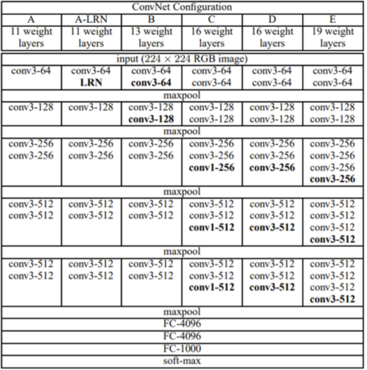

*High level architecture*:

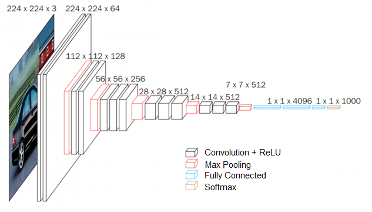

In [ ]:
class VGG16_clas:
    def __init__(self, batch_size=32, epochs=500, num_classes=20):
        self.batch_size = batch_size                                        # batch size
        self.nepochs = epochs                                                   # number of maximum epochs
        self.optim = Adam(learning_rate=1e-2)                               # use Adam with higher lr
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True)       # Binary cross entropy since classes are independent

        # Download VGG16 pretrained on 'ImageNet' without top layers
        self.base_model = VGG16(include_top=False,
                          weights="imagenet")
      
        self.base_model.trainable = False
        inputs = Input((224, 224, 3))
        x = self.base_model(inputs, training=False)
        x = GlobalAveragePooling2D()(x)
        x = Dropout(0.2)(x)
        x = Dense(1024, activation='relu')(x)
        outputs = Dense(num_classes, activation='sigmoid')(x)

        # Build model
        self.model = Model(inputs, outputs)
        metrics_tmp = [ keras.metrics.BinaryAccuracy(name='binary_accuracy'),
                  keras.metrics.AUC(name='auc'),
                  keras.metrics.AUC(name='prc', curve='PR')
                ]
      
        # Compile model
        self.model.compile(loss=self.loss, optimizer=self.optim, metrics=metrics_tmp)
        
        self.train_datagen = ImageDataGenerator(rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
          
        self.val_datagen = ImageDataGenerator(rescale=1./255)
          
  

    def train(self, x_train, y_train, x_val, y_val):
        """Trains model"""
        ntrain = x_train.shape[0]       # train samples   
        nval = x_val.shape[0]           # val samples
  
        train_gen = self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)         # make generator for train
        val_gen = self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=False)  # make generator for val
  
        # Keep checkpoints for saving and restoring models
        checkpoint = ModelCheckpoint('vgg16.h15',
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True,
                                        verbose=1)
        # Early stopping
        earlystop = EarlyStopping(monitor='val_loss',
                                        min_delta=0,
                                        patience=24,
                                        verbose=1,
                                        restore_best_weights=True)
        # Adaptive lr
        rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=16)
  
        # Actually train the model
        self.hist1 = self.model.fit(train_gen,
                                    epochs=self.nepochs,
                                    steps_per_epoch=ntrain // self.batch_size,
                                    validation_data=val_gen,
                                    validation_steps=nval // self.batch_size,
                                    callbacks=[rlrop, earlystop, checkpoint]
                                    )
        # Now unfreeze the base model and fine tune it for a few epochs with very low lr
        self.base_model.trainable = True
        self.model.compile(
            optimizer=Adam(1e-5),  # Low learning rate
            loss=keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[keras.metrics.BinaryAccuracy()],
        )
        # Train the model a second time
        self.hist2 = self.model.fit(train_gen, epochs=8, validation_data=val_gen, callbacks=[checkpoint])

    def predict(self, test_X):
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
    
    def plot(self):
        return plot_model(self.model, show_shapes=True, show_layer_names=True)
        
    def __call__(self, X):
        return self.predict(X)

In [ ]:
if train_CNN == True:
    vgg16_clas = VGG16_clas()

    vgg16_clas.train(train_X,train_y, val_X, val_y)
    vgg16_clas.model.save('vgg16.h5')
else:
    vgg16_clas = tf.keras.models.load_model('vgg16.h5')

In [ ]:
plot_model(vgg16_clas, show_shapes=True, show_layer_names=True)

#### 2.1.2 Inception V3

The inception V3 model mainly focuses on reducing the required computational power by modifying and improving previous versions of the Inception architecture. Compared to VGGNet, the Inception model have proven to be more efficient computationally wise, in terms of the number of parameters as well as regarding the economic costs incurred (memory and various resources). Techniques applied in the third version of the Inception model include convolutions, regularizations, dimension reduction, and parallelized computations. The developers of Inception V3 were able to reduce the computational efficiency using factorized convolutions. The aim of this is to reduce the total number of parameters that need to be trained in the architecture. 

Like VGG16, convolutions of smaller sizes are introduced for the same purpose: improving the training efficiency. Another update is to application of auxiliary classifiers. These are small CNN that are placed between layers in the training phase. The measured loss for these small architectures is then added to the overall model loss. The purpose of these small models is to opt as a regularization’s mechanism. 

*Low level architecture:*

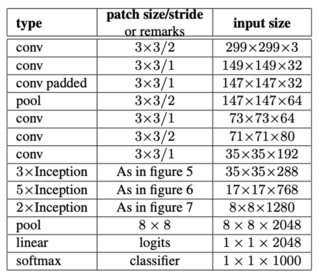

*High level architecture:*

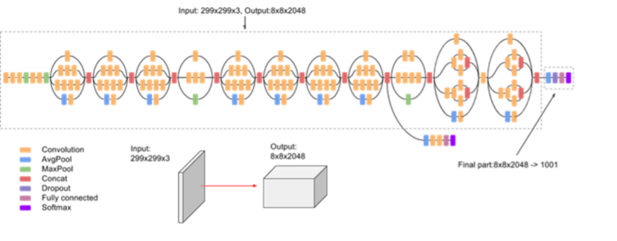

In [ ]:
class InceptionV3_clas:
    def __init__(self, batch_size=32, epochs=500, num_classes=20):
        self.batch_size = batch_size                                        # batch size
        self.nepochs = epochs                                                   # number of maximum epochs
        self.optim = Adam(learning_rate=1e-2)                               # use Adam with higher lr
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True)       # Binary cross entropy since classes are independent

        # Download VGG16 pretrained on 'ImageNet' without top layers
        self.base_model = InceptionV3(input_shape = (224, 224, 3),
                                    include_top = False,
                                    weights = 'imagenet')
      
        self.base_model.trainable = False
        inputs = Input((224, 224, 3))
        x = self.base_model(inputs, training=False)
        x = GlobalAveragePooling2D()(x)
        x = Dropout(0.2)(x)
        x = Dense(1024, activation='relu')(x)
        outputs = Dense(num_classes, activation='sigmoid')(x)

        # Build model
        self.model = Model(inputs, outputs)
        metrics_tmp = [ keras.metrics.BinaryAccuracy(name='binary_accuracy'),
                  keras.metrics.AUC(name='auc'),
                  keras.metrics.AUC(name='prc', curve='PR')
                ]
      
        # Compile model
        self.model.compile(loss=self.loss, optimizer=self.optim, metrics=metrics_tmp)
        
        self.train_datagen = ImageDataGenerator(rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
          
        self.val_datagen = ImageDataGenerator(rescale=1./255)
          
  

    def train(self, x_train, y_train, x_val, y_val):
        """Trains model"""
        ntrain = x_train.shape[0]       # train samples   
        nval = x_val.shape[0]           # val samples
  
        train_gen = self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)         # make generator for train
        val_gen = self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=False)  # make generator for val
  
        # Keep checkpoints for saving and restoring models
        checkpoint = ModelCheckpoint('inceptionV3.h15',
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True,
                                        verbose=1)
        # Early stopping
        earlystop = EarlyStopping(monitor='val_loss',
                                        min_delta=0,
                                        patience=24,
                                        verbose=1,
                                        restore_best_weights=True)
        # Adaptive lr
        rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=16)
  
        # Actually train the model
        self.hist1 = self.model.fit(train_gen,
                                    epochs=self.nepochs,
                                    steps_per_epoch=ntrain // self.batch_size,
                                    validation_data=val_gen,
                                    validation_steps=nval // self.batch_size,
                                    callbacks=[rlrop, earlystop, checkpoint]
                                    )
        # Now unfreeze the base model and fine tune it for a few epochs with very low lr
        self.base_model.trainable = True
        self.model.compile(
            optimizer=Adam(1e-5),  # Low learning rate
            loss=keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[keras.metrics.BinaryAccuracy()],
        )
        # Train the model a second time
        self.hist2 = self.model.fit(train_gen, epochs=8, validation_data=val_gen, callbacks=[checkpoint])

    def predict(self, test_X):
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
    
    def plot(self):
        return plot_model(self.model, show_shapes=True, show_layer_names=True)
        
    def __call__(self, X):
        return self.predict(X)

In [ ]:
if train_CNN == True:
    inceptionV3_clas = InceptionV3_clas()

    inceptionV3_clas.train(train_X,train_y, val_X, val_y)
    inceptionV3_clas.model.save('inceptionV3.h5')
else:
    inceptionV3_clas = tf.keras.models.load_model('inceptionV3.h5')

plot_model(inceptionV3_clas, show_shapes=True, show_layer_names=True)

#### 2.1.3 Xception

Xception is the ‘extreme’ version of the inception model, both created by Google . Xception is considered better due to the modified depth wise separable convolution. Previously, the pointwise convolution was executed before the depth wise convolution. So the Xception model first perform 1 x 1 convolution and next the channel-wise spatial convolution. However, this modification is considered unimportant because when it is used in a stacked setting, there are only small differences appeared at the beginning and at the end of all the chained inception modules. Another difference compared to the earlier Inception model is that there is no intermediate ReLU non-linearity. 

*Low level architecture:*

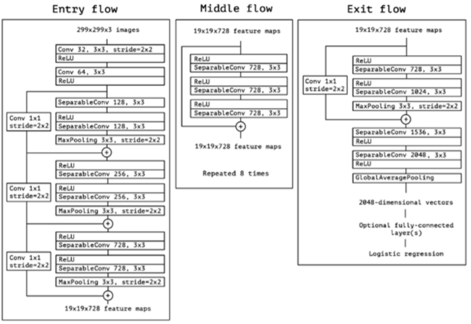

*High level architecture:*

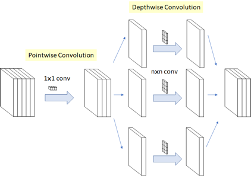

In [ ]:
class Xception_clas:
    def __init__(self, batch_size=32, epochs=500, num_classes=20):
        self.batch_size = batch_size                                        # batch size
        self.nepochs = epochs                                                   # number of maximum epochs
        self.optim = Adam(learning_rate=1e-2)                               # use Adam with higher lr
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True)       # Binary cross entropy since classes are independent

        # Download VGG16 pretrained on 'ImageNet' without top layers
        self.base_model = Xception(input_shape = (224, 224, 3),
                                    include_top = False,
                                    weights = 'imagenet')
      
        self.base_model.trainable = False
        inputs = Input((224, 224, 3))
        x = self.base_model(inputs, training=False)
        x = GlobalAveragePooling2D()(x)
        x = Dropout(0.2)(x)
        x = Dense(1024, activation='relu')(x)
        outputs = Dense(num_classes, activation='sigmoid')(x)

        # Build model
        self.model = Model(inputs, outputs)
        metrics_tmp = [ keras.metrics.BinaryAccuracy(name='binary_accuracy'),
                  keras.metrics.AUC(name='auc'),
                  keras.metrics.AUC(name='prc', curve='PR')
                ]
      
        # Compile model
        self.model.compile(loss=self.loss, optimizer=self.optim, metrics=metrics_tmp)
        
        self.train_datagen = ImageDataGenerator(rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
          
        self.val_datagen = ImageDataGenerator(rescale=1./255)
          
  

    def train(self, x_train, y_train, x_val, y_val):
        """Trains model"""
        ntrain = x_train.shape[0]       # train samples   
        nval = x_val.shape[0]           # val samples
  
        train_gen = self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)         # make generator for train
        val_gen = self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=False)  # make generator for val
  
        # Keep checkpoints for saving and restoring models
        checkpoint = ModelCheckpoint('inceptionV3.h15',
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True,
                                        verbose=1)
        # Early stopping
        earlystop = EarlyStopping(monitor='val_loss',
                                        min_delta=0,
                                        patience=24,
                                        verbose=1,
                                        restore_best_weights=True)
        # Adaptive lr
        rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=16)
  
        # Actually train the model
        self.hist1 = self.model.fit(train_gen,
                                    epochs=self.nepochs,
                                    steps_per_epoch=ntrain // self.batch_size,
                                    validation_data=val_gen,
                                    validation_steps=nval // self.batch_size,
                                    callbacks=[rlrop, earlystop, checkpoint]
                                    )
        # Now unfreeze the base model and fine tune it for a few epochs with very low lr
        self.base_model.trainable = True
        self.model.compile(
            optimizer=Adam(1e-5),  # Low learning rate
            loss=keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[keras.metrics.BinaryAccuracy()],
        )
        # Train the model a second time
        self.hist2 = self.model.fit(train_gen, epochs=8, validation_data=val_gen, callbacks=[checkpoint])

    def predict(self, test_X):
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
    
    def plot(self):
        return plot_model(self.model, show_shapes=True, show_layer_names=True)
        
    def __call__(self, X):
        return self.predict(X)

In [ ]:
if train_CNN == True:
    xception_clas = InceptionV3_clas()

    xception_clas.train(train_X,train_y, val_X, val_y)
    xception_clas.model.save('xception.h5')
else:
    xception_clas = tf.keras.models.load_model('xception.h5')

plot_model(xception_clas, show_shapes=True, show_layer_names=True)

#### 2.1.4. NasNetLarge

Neural Architecture Search Network (or NASNet) is a convulational neural network that is trained to be able to categorize objects within an image. It can classify these within one of the 1000 categories on which it was pre-trained. This is a fairly recent model, which was developed in 2017. For the purpose of this project, we load the model using the weights provided by its training on imagenet. As such, the model has not previously seen the images in our dataset, leading to the most accurate results. 
When using this model, the user should be mindful of the following:
-	NASNet expects a specific input size of 331x331, this is different than the other models we used, which were trained on 224x224 images. As such they have to be resized.
-	NASNet uses a default dropout factor of 0.5 
-	It has a total of 89.07M parameters. This means that it is a fairly sizeable model and can be expected to more time to train than the previously trained models.
NASNet-Large, the model we use, has been able to set a high baseline of accuracies across different image datasets. It seems to perform slightly less accurate than EfficientNetV2, which is the current state-of-the-art.


In [ ]:
train_y = np.array(train_df_downsampled[labels])
test_y_df = np.array(test_df[labels])

# Resize to 331x331
train_X = np.stack([cv2.resize(train_df_downsampled["img"].loc[i], (331,331)) for i in range(len(train_df_downsampled))], axis=0)
test_X = np.stack([cv2.resize(test_df["img"].loc[i], (331,331)) for i in range(len(test_df))], axis=0)

print(f'Train samples: {train_X.shape[0]}')
print(f'Test samples: {test_X.shape[0]}')

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2,random_state=12)

train_X = np.asarray(train_X)
train_y = np.asarray(train_y)
val_X = np.asarray(val_X)
val_y = np.asarray(val_y)

In [ ]:
from tensorflow.keras.applications import *
class NasNet_clas:
    def __init__(self, batch_size=32, epochs=500, num_classes=20):
        self.batch_size = batch_size                                        # batch size
        self.nepochs = epochs                                                   # number of maximum epochs
        self.optim = Adam(learning_rate=1e-2)                               # use Adam with higher lr
        self.loss = keras.losses.BinaryCrossentropy(from_logits=True)       # Binary cross entropy since classes are independent

        # Download VGG16 pretrained on 'ImageNet' without top layers
        self.base_model = NasNetLarge(input_shape = (331, 331, 3),
                                    include_top = False,
                                    weights = 'imagenet')
      
        self.base_model.trainable = False
        inputs = Input((331, 331, 3))
        x = self.base_model(inputs, training=False)
        x = GlobalAveragePooling2D()(x)
        x = Dropout(0.2)(x)
        x = Dense(1024, activation='relu')(x)
        outputs = Dense(num_classes, activation='sigmoid')(x)

        # Build model
        self.model = Model(inputs, outputs)
        metrics_tmp = [ keras.metrics.BinaryAccuracy(name='binary_accuracy'),
                  keras.metrics.AUC(name='auc'),
                  keras.metrics.AUC(name='prc', curve='PR')
                ]
      
        # Compile model
        self.model.compile(loss=self.loss, optimizer=self.optim, metrics=metrics_tmp)
        
        self.train_datagen = ImageDataGenerator(rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
          
        self.val_datagen = ImageDataGenerator(rescale=1./255)
          
  

    def train(self, x_train, y_train, x_val, y_val):
        """Trains model"""
        ntrain = x_train.shape[0]       # train samples   
        nval = x_val.shape[0]           # val samples
  
        train_gen = self.train_datagen.flow(x_train, y_train, batch_size=self.batch_size)         # make generator for train
        val_gen = self.val_datagen.flow(x_val, y_val, batch_size=self.batch_size, shuffle=False)  # make generator for val
  
        # Keep checkpoints for saving and restoring models
        checkpoint = ModelCheckpoint('nasnet.h15',
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True,
                                        verbose=1)
        # Early stopping
        earlystop = EarlyStopping(monitor='val_loss',
                                        min_delta=0,
                                        patience=24,
                                        verbose=1,
                                        restore_best_weights=True)
        # Adaptive lr
        rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=16)
  
        # Actually train the model
        self.hist1 = self.model.fit(train_gen,
                                    epochs=self.nepochs,
                                    steps_per_epoch=ntrain // self.batch_size,
                                    validation_data=val_gen,
                                    validation_steps=nval // self.batch_size,
                                    callbacks=[rlrop, earlystop, checkpoint]
                                    )
        # Now unfreeze the base model and fine tune it for a few epochs with very low lr
        self.base_model.trainable = True
        self.model.compile(
            optimizer=Adam(1e-5),  # Low learning rate
            loss=keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=[keras.metrics.BinaryAccuracy()],
        )
        # Train the model a second time
        self.hist2 = self.model.fit(train_gen, epochs=8, validation_data=val_gen, callbacks=[checkpoint])

    def predict(self, test_X):
        test_gen = self.val_datagen.flow(test_X, batch_size=32, shuffle=False)
        return self.model.predict(test_gen)
    
    def plot(self):
        return plot_model(self.model, show_shapes=True, show_layer_names=True)
        
    def __call__(self, X):
        return self.predict(X)

In [ ]:
if train_CNN == True:
    nasnet_clas = NasNet_clas()

    nasnet_clas.train(train_X,train_y, val_X, val_y)
    nasnet_clas.model.save('nasnet')
else:
    #Loading this model will lead to poor results when done on kaggle - instead the predictions made on a local computer are imported, these are made with the exact same model
    pred_y = np.load('predictions_NasNet.npy')
    #nasnet_clas = tf.keras.models.load_model('nasnet')

# plot_model(nasnet_clas, show_shapes=True, show_layer_names=True)

In [ ]:
threshold = 0.2
# pred_y = nasnet_clas.predict(test_X)
pred_y2 = (pred_y > threshold).astype(int)
test_df.loc[:, labels] = pred_y2

# 3. Semantic segmentation
The goal here is to implement a segmentation CNN that labels every pixel in the image as belonging to one of the 20 classes (and background and border). We are going to try a CNN network from scratch and use pretrained models (MobileNet and ResNet). 

### Constants
Here are some constants we are going to use, you can refer here for values.

In [ ]:
VALIDATION_SIZE = len(test_df)
TRAINING_SIZE = len(train_df)

# ImageDataGenerator parameters
VALIDATION_SPLIT_SIZE = 0.05
RESCALE = 1./255
SEED = 0

BATCH_SIZE = 64
STEPS_PER_EPOCH = TRAINING_SIZE // BATCH_SIZE
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMAGE_CHANNELS = 3
IMAGE_SIZE = [IMG_WIDTH, IMG_HEIGHT]

INPUT_SHAPE = [IMG_WIDTH, IMG_HEIGHT, IMAGE_CHANNELS]
OUTPUT_CHANNELS = 22  # 20 objects + background + border
print(f'Output channel number: {OUTPUT_CHANNELS}')


## Data Augmentation
As we check in the classification task, our data is imbalanced. This imbalance is highly effective to segmentation task too. Additionally, for segmentation, we have `background` class which provides more imbalance to our current task. In order to prevent this, we will use data augmentation, which will help us to balance the data and therefore generalize better.

Firstly, we are going to resize our original images and masks/segments (both train and test) into `128 x 128` shape. This is also going to be the input size of our models.

In [ ]:
# Create empty template arrays for faster processes
train_img = np.empty((TRAINING_SIZE, IMG_WIDTH, IMG_HEIGHT, 3))
train_masks = np.empty((TRAINING_SIZE, IMG_WIDTH, IMG_HEIGHT), dtype='uint8')

# Process training data images and segments
for i, (img, seg) in enumerate(zip(train_df["img"], train_df["seg"])):
    train_img[i] = tf.image.resize(img, IMAGE_SIZE)
    train_masks[i] = cv2.resize(seg, IMAGE_SIZE, interpolation=cv2.INTER_NEAREST)

# Process validation data images
test_img = np.empty((VALIDATION_SIZE, IMG_WIDTH, IMG_HEIGHT, 3)) 
for i, img in enumerate(test_df["img"]):
    test_img[i] = tf.image.resize(img, IMAGE_SIZE)

### Generate training data (image and mask)

We are going to use `ImageDataGenerator` function of Keras. With this function, we can rotate our images, zoom in, flip and split into validation set.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# IMAGE
seg_image_gen = ImageDataGenerator(rotation_range=10, rescale=RESCALE, shear_range=0.05, zoom_range=0.1, horizontal_flip=True, validation_split=VALIDATION_SPLIT_SIZE)
seg_image_gen.fit(train_img)

# MASK
extended_mask = train_masks[..., tf.newaxis]
seg_mask_gen = ImageDataGenerator(rotation_range=10, shear_range=0.05, zoom_range=0.1, horizontal_flip=True, validation_split=VALIDATION_SPLIT_SIZE)
seg_mask_gen.fit(extended_mask)

img_gen_flow = seg_image_gen.flow(seed=SEED, x = train_img, batch_size=BATCH_SIZE, subset='training')        
mask_gen_flow = seg_mask_gen.flow(seed=SEED,x = extended_mask, batch_size=BATCH_SIZE, subset='training')

Do the same processes for validation data

In [ ]:
img_gen_flow_validation = seg_image_gen.flow(seed=SEED, x = train_img, batch_size=BATCH_SIZE, subset='validation')        
mask_gen_flow_validation = seg_mask_gen.flow(seed=SEED, x = train_masks[..., tf.newaxis], batch_size=BATCH_SIZE, subset='validation')

We don't need to flip or zoom in to our test data. We are going to rescale it so that our model can generalize and that's all.

In [ ]:
test_img_gen = ImageDataGenerator(rescale=RESCALE)
test_img_gen.fit(test_img)
test_img_gen_flow = test_img_gen.flow(x=test_img, shuffle=False, batch_size=BATCH_SIZE)

## Visualize Some Image and Masks

`display` function displays images and masks, and gives relevant titles 

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

### Traning data examples
Let's display some of our data after augmentation

In [ ]:
x = img_gen_flow[0]
y = mask_gen_flow[0]
for i in range(2):
    display([x[i], y[i]])

### Validation data examples

In [ ]:
x = img_gen_flow_validation[0]
y = mask_gen_flow_validation[0]
for i in range(2):
    display([x[i], y[i]])

## Transfer Learning - Segmentation

We are going to use a modified version of [U-Net](https://arxiv.org/abs/1505.04597]). There is an encoder and a decoder part of a U-net. As an encoder, we will use a MobileNetV2 or ResNet and for the decoder, we are going to use [pix2pix](https://arxiv.org/abs/1611.07004) which has several upsampling models. There is going to be one final convolution layer.

In [ ]:
!pip install -q git+https://github.com/tensorflow/examples.git

### MobileNetV2
We are going to first fine tune MobileNetV2. It reduces the number of trainable parameters and can learn robust features. 

In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

def mobilenet_model_func(output_channels:int):
  base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

  # Use the activations of these layers
  layer_names = [
      'block_1_expand_relu',   # 64x64
      'block_3_expand_relu',   # 32x32
      'block_6_expand_relu',   # 16x16
      'block_13_expand_relu',  # 8x8
      'block_16_project',      # 4x4
  ]
  base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

  # Create the feature extraction model
  down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
  down_stack.trainable = False

  up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
  ]
  inputs = tf.keras.layers.Input(shape=[IMG_WIDTH, IMG_HEIGHT, IMAGE_CHANNELS])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)
  return tf.keras.Model(inputs=inputs, outputs=x)

For our model, we are going to use `accuracy` as our evaluation metric and `adam` optimizer. As our loss function, we choose `SparseCategoricalCrossentropy`. This loss calculates the categorical cross entropy, however it is more efficient with more classes as we have in this dataset. 

In [ ]:
mobilenet_model = mobilenet_model_func(output_channels=OUTPUT_CHANNELS)
mobilenet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

As you can see in the image, we added skip connections from earlier layers in the network. We expect it to provide the necessary detail in order to reconstruct accurate shapes for segmentation boundaries as we also have boundary label

In [ ]:
tf.keras.utils.plot_model(mobilenet_model, show_shapes=True)

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

#### Examples before training
Let's see some predictions. Our model can be used without training as it is already trained with some data.

In [ ]:
# There are 12 batches and each batch has 64 images expect the last, that one has 46
prediction_images = [(10, 23), (10, 33), (1, 45)]
for batch, image in prediction_images:
    sample_image = img_gen_flow[batch][image]
    sample_mask = mask_gen_flow[batch][image]
    display([sample_image, sample_mask,
             create_mask(mobilenet_model.predict(sample_image[tf.newaxis, ...]))])

However, as you can see, out model is not performant enough to use it as it is need. We need to fine-tune some parameters.

## Fine-tune Segmentation Model

Create `ModelData` class to manipulate out data in a model 

In [ ]:
class ModelData(tf.keras.utils.Sequence):
    def __init__(self, img_gen_flow, mask_gen_flow, length):
        self.img_gen_flow = img_gen_flow
        self.mask_gen_flow = mask_gen_flow
        self.length = length

    # __getitem__ is necessary for the model
    def __getitem__(self, index):
        img_batch = self.img_gen_flow[index]
        mask_batch = self.mask_gen_flow[index]
        return img_batch, mask_batch
    
    # __len__ is necessary for the model
    def __len__(self):
        return self.length 

In [ ]:
from IPython.display import clear_output

class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    display([sample_image, sample_mask,
             create_mask(mobilenet_model.predict(sample_image[tf.newaxis, ...]))])
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

#### Implementation
As a default value, we set `EPOCH` as 150. However, since we created an early stopping mechanism, it shouln't be a problem. We defined some callback functions which are going to be called after every epoch.
* `DisplayCallback` -> This callback will display a prediction for an image so that we can visualize the learning of the model
* `ModelCheckpoint` -> This function checks the validation loss and saves the weight which gives the min validation loss till that epoch
* `ReduceLROnPlateau` -> Reduces learning rate by 0.2 when validation loss has stopped improving. It waits for 20 epoch before reducing
* `EarlyStopping` -> Stops the training if validation loss hasn't changed for 30 epochs to prevent overfitting to the training data


In [ ]:
%%time
from tensorflow import keras

EPOCHS = 150
MOBILENET_MODEL = f"mobilenet_model_epoch_{EPOCHS}"
MOBILENET_HISTORY_PATH = f'/kaggle/working/{MOBILENET_MODEL}.csv'
MOBILENET_MODEL_PATH = f'/kaggle/working/{MOBILENET_MODEL}.h5'

callbacks = [
    DisplayCallback(),
    keras.callbacks.ModelCheckpoint(MOBILENET_MODEL_PATH, save_weights_only=True, save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(factor=0.2, monitor='val_loss', min_lr=1e-5, verbose=1, patience=20),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True),
]

model_train_data = ModelData(img_gen_flow, mask_gen_flow, TRAINING_SIZE// BATCH_SIZE)
model_validation_data = ModelData(img_gen_flow_validation, mask_gen_flow_validation, len(img_gen_flow_validation))


TRAINING_ENABLED = False
if TRAINING_ENABLED:
    print("model is training...")
    model_history = mobilenet_model.fit(model_train_data, epochs=EPOCHS,
                            steps_per_epoch=STEPS_PER_EPOCH,
                            validation_data=model_validation_data,
                            callbacks=callbacks
                            )
    print("model history is saving")
    hist_df = pd.DataFrame(model_history.history)
    with open(MOBILENET_HISTORY_PATH, mode='w') as f:
        hist_df.to_csv(f)

#### Load models

In [ ]:
if TRAINING_ENABLED == False:
    mobilenet_model = mobilenet_model_func(output_channels=OUTPUT_CHANNELS)
    mobilenet_model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    print("model is loading...")            
    mobilenet_model.load_weights(MOBILENET_MODEL_PATH)
    print("history is loading...")
    hist_df = pd.read_csv(MOBILENET_HISTORY_PATH, index_col=0)

#### Loss Graph

In [ ]:
loss = hist_df['loss']
val_loss = hist_df['val_loss']

plt.figure()
plt.plot(hist_df.index, loss, 'r', label='Training loss')
plt.plot(hist_df.index, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

#### Accuracy Graph

In [ ]:
acc = hist_df['accuracy']
val_acc = hist_df['val_accuracy']

plt.figure()
plt.plot(hist_df.index, acc, 'r', label='Training Accuracy')
plt.plot(hist_df.index, val_acc, 'bo', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

### `ResNetV2`
Implementation of arhitecture from https://arxiv.org/abs/1512.03385

In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

def resnet_model_func(output_channels:int):
  base_model = tf.keras.applications.ResNet50V2(input_shape=[128, 128, 3], include_top=False, weights='imagenet')

  # Use the activations of these layers
  layer_names = [
      'conv1_conv',
      'conv2_block1_preact_relu',
      'conv3_block1_preact_relu',
      'conv4_block1_preact_relu',
      'conv5_block1_preact_relu',
  ] 
  base_model_outputs = [base_model.get_layer(name).output for name in layer_names]

  # Create the feature extraction model
  down_stack = tf.keras.Model(inputs=base_model.input, outputs=base_model_outputs)
  down_stack.trainable = False

  up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
  ]
  inputs = tf.keras.layers.Input(shape=[IMG_WIDTH, IMG_HEIGHT, IMAGE_CHANNELS])

  # Downsampling through the model
  skips = down_stack(inputs)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      filters=output_channels, kernel_size=3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)
  return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
resnet_model = resnet_model_func(output_channels=OUTPUT_CHANNELS)
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
tf.keras.utils.plot_model(resnet_model, show_shapes=True)

#### Examples without training
We are going to check the same images with ResNet

In [ ]:
# There are 12 batches and each batch has 64 images expect the last, that one has 46
prediction_images = [(10, 23), (10, 33), (1, 45)]
for batch, image in prediction_images:
    sample_image = img_gen_flow[batch][image]
    sample_mask = mask_gen_flow[batch][image]
    display([sample_image, sample_mask,
             create_mask(resnet_model.predict(sample_image[tf.newaxis, ...]))])

#### Implementation
Same steps with the MobileNet

In [ ]:
from IPython.display import clear_output

class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    display([sample_image, sample_mask,
             create_mask(resnet_model.predict(sample_image[tf.newaxis, ...]))])
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [ ]:
%%time
from tensorflow import keras

EPOCHS = 150
RESNET_MODEL = f"resnet_model_epoch_{EPOCHS}"
RESNET_HISTORY_PATH = f'/kaggle/working/{RESNET_MODEL}.csv'
RESNET_MODEL_PATH = f'/kaggle/working/{RESNET_MODEL}.h5'

callbacks = [
    DisplayCallback(),
    keras.callbacks.ModelCheckpoint(RESNET_MODEL_PATH, save_weights_only=True, save_best_only=True, mode='min'),
    keras.callbacks.ReduceLROnPlateau(factor=0.2, monitor='val_loss', min_lr=1e-5, verbose=1, patience=20),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True),
]

model_train_data = ModelData(img_gen_flow, mask_gen_flow, TRAINING_SIZE// BATCH_SIZE)
model_validation_data = ModelData(img_gen_flow_validation, mask_gen_flow_validation, len(img_gen_flow_validation))


TRAINING_ENABLED = False
if TRAINING_ENABLED:
    print("model is training...")
    model_history = resnet_model.fit(model_train_data, epochs=EPOCHS,
                            steps_per_epoch=STEPS_PER_EPOCH,
                            validation_data=model_validation_data,
                            callbacks=callbacks
                            )
    print("model history is saving")
    hist_df = pd.DataFrame(model_history.history)
    with open(RESNET_HISTORY_PATH, mode='w') as f:
        hist_df.to_csv(f)

#### Load Model
Instead of training it, we are going to load the model that was trained with the pipeline above

In [ ]:
if TRAINING_ENABLED == False:
    resnet_model = resnet_model_func(output_channels=OUTPUT_CHANNELS)
    resnet_model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    print("model is loading...")            
    resnet_model.load_weights(RESNET_MODEL_PATH)
    print("history is loading...")
    hist_df = pd.read_csv(RESNET_HISTORY_PATH, index_col=0)

#### Loss Graph

In [ ]:
loss = hist_df['loss']
val_loss = hist_df['val_loss']

plt.figure()
plt.plot(hist_df.index, loss, 'r', label='Training loss')
plt.plot(hist_df.index, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

#### Accuracy Graph

In [ ]:
acc = hist_df['accuracy']
val_acc = hist_df['val_accuracy']

plt.figure()
plt.plot(hist_df.index, acc, 'r', label='Training Accuracy')
plt.plot(hist_df.index, val_acc, 'bo', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

## Semantic segmentation model from scratch

We can also try to design/train a model from scratch. As earlier discussed, a semantic segmentation CNN consists of an encoder and a decoder part, preferrably with skipconnections, connecting the encoder and decoder. thes skip connections are implemented to reduce the loss of low-level information, enhancing the segmentation boundaries the decoder produces.

### Design the encoder-decoder CNN

In [ ]:
from keras.layers import Conv2D, Dropout, MaxPooling2D, UpSampling2D, Input, concatenate
!pip install keras-segmentation
#from keras_segmentation.models.model_utils import get_segmentation_model
def scratch_segmentation_network(image_size,output_channels):
    #creating input layer
    inputlayer = Input(shape=image_size)
    
    # design encoder structure
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputlayer)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
        
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
    
    # design decoder structure
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(256, (3, 3), activation='relu', padding='same')(c4)
    
    up1 = concatenate([UpSampling2D((2, 2))(c4), c3], axis=-1)
    c5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) #replace p2 with up1 if layers above are included again
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(128, (3, 3), activation='relu', padding='same')(c5)
    
    up2 = concatenate([UpSampling2D((2, 2))(c5), c2], axis=-1)
    c6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(64, (3, 3), activation='relu', padding='same')(c6)
    
    up3 = concatenate([UpSampling2D((2, 2))(c6), c1], axis=-1)
    c7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up3)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(32, (3, 3), activation='relu', padding='same')(c7)
    # design the output classification layer
    outputlayer = Conv2D(output_channels, 3 , activation = "softmax", padding = "same")(c7)
    model = tf.keras.Model(inputlayer, outputlayer)
    return model

### Visualize the model

In [ ]:
from keras.utils.vis_utils import plot_model
scratch_model = scratch_segmentation_network(INPUT_SHAPE,OUTPUT_CHANNELS)
scratch_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
plot_model(scratch_model, show_shapes=True, show_layer_names=True)

### Train the model

In [ ]:
SCRATCH_EPOCHS = 100
SCRATCH_TRAINING_ENABLED = train_CNN
if SCRATCH_TRAINING_ENABLED:
    print("model is training...")
    scratch_model_history = scratch_model.fit(model_train_data, epochs=SCRATCH_EPOCHS,
                            steps_per_epoch=STEPS_PER_EPOCH,
                            validation_data=model_validation_data,
                            callbacks=[DisplayCallback()]
                            )
    print("model is saving...")
    scratch_model.save(f'scratch_model_epoch_{SCRATCH_EPOCHS}')
else:
    !pip install gdown
    print("downloading the trained model")
    !gdown 17S_hKwUJZN-6GQPdvRP--v3n0nfssuJl --folder
    print("model is loading...")
    #!gdown https://drive.google.com/drive/folders/17S_hKwUJZN-6GQPdvRP--v3n0nfssuJl?usp=sharing
    scratch_model = keras.models.load_model(f'scratch_model_epoch_{SCRATCH_EPOCHS}')
    print("model loaded!")

### Compare models

In [ ]:
# Define index for the image
index = 4

#### CNN from scratch

In [ ]:
for img, seg in model_validation_data:
    display([img[index], seg[index],create_mask(scratch_model.predict(img[index][tf.newaxis, ...]))])

#### ResNet

In [ ]:
resnet_model = resnet_model_func(output_channels=OUTPUT_CHANNELS)
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
resnet_model.load_weights("/kaggle/working/resnet_model_epoch_150.h5")
for img, seg in model_validation_data:
    display([img[index], seg[index],create_mask(resnet_model.predict(img[index][tf.newaxis, ...]))])

In [ ]:
early_resnet_model = resnet_model_func(output_channels=OUTPUT_CHANNELS)
early_resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_resnet_model.load_weights("/kaggle/working/early_stop_resnet_model_epoch_150.h5")
for img, seg in model_validation_data:
    display([img[index], seg[index],create_mask(early_resnet_model.predict(img[index][tf.newaxis, ...]))])

#### MobileNet

In [ ]:
mobilenet_model = mobilenet_model_func(output_channels=OUTPUT_CHANNELS)
mobilenet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
mobilenet_model.load_weights("/kaggle/working/mobilenet_model_epoch_150.h5")
for img, seg in model_validation_data:
    display([img[index], seg[index],create_mask(mobilenet_model.predict(img[index][tf.newaxis, ...]))])

In [ ]:
early_mobilenet_model = mobilenet_model_func(output_channels=OUTPUT_CHANNELS)
early_mobilenet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
early_mobilenet_model.load_weights("/kaggle/working/early_stop_mobilenet_model_epoch_150.h5")
for img, seg in model_validation_data:
    display([img[index], seg[index],create_mask(early_mobilenet_model.predict(img[index][tf.newaxis, ...]))])

In [ ]:
best_mobilenet_model = mobilenet_model_func(output_channels=OUTPUT_CHANNELS)
best_mobilenet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
best_mobilenet_model.load_weights("/kaggle/working/transfer_mobilenet_model_epoch_400.h5")
for img, seg in model_validation_data:
    display([img[index], seg[index],create_mask(best_mobilenet_model.predict(img[index][tf.newaxis, ...]))])

### Predict Test Data
As MobileNet was more performant, we are going to use it for predictions

In [ ]:
final_model = best_mobilenet_model

In [ ]:
class ModelTestData(tf.keras.utils.Sequence):
    def __init__(self, img_gen_flow):
        self.img_gen_flow = img_gen_flow

    # __getitem__ is necessary for the model
    def __getitem__(self, index):
        img_batch = self.img_gen_flow[index]
        return img_batch
    
    # __len__ is necessary for the model
    def __len__(self):
        return len(self.img_gen_flow) 

model_test_data = ModelTestData(test_img_gen_flow)

pred_seg = np.empty((VALIDATION_SIZE, IMG_WIDTH, IMG_HEIGHT, OUTPUT_CHANNELS))
i = 0
for batch in model_test_data:
    for batch_image in batch:
        pred_seg[i] =  final_model.predict(batch_image[tf.newaxis, ...])
        i += 1

Show some of the test data predictions

In [ ]:
for img in model_test_data:
    index = 12
    display([img[index], create_mask(final_model.predict(img[index][tf.newaxis, ...]))])

In [ ]:
%%time
def resize_to_original(mask_predictions):
    reshaped_segments = []
    for i, pred in enumerate(mask_predictions):
        img = np.zeros((IMG_WIDTH, IMG_HEIGHT))
        for x in range(IMG_HEIGHT):
            for y in range(IMG_WIDTH):
                img[x][y] = int(np.argmax(pred[x][y]))
        original_width, original_height = test_df["img"][i].shape[0], test_df["img"][i].shape[1]
        resized_mask = cv2.resize(img, (original_height, original_width), interpolation=cv2.INTER_CUBIC)
        reshaped_segments.append(resized_mask)
    return reshaped_segments
     
test_df.loc[:, "seg"] = resize_to_original(pred_seg)

## Submit to competition
You don't need to edit this section. Just use it at the right position in the notebook. See the definition of this function in Sect. 1.3 for more details.

In [ ]:
generate_submission(test_df)

# 4. Adversarial attack
For this part, your goal is to fool your classification and/or segmentation CNN, using an *adversarial attack*. More specifically, the goal is build a CNN to perturb test images in a way that (i) they look unperturbed to humans; but (ii) the CNN classifies/segments these images in line with the perturbations.

## 4.1 FGSM
The Fast Gradient Sign Method (FGSM) is a simple white box attack. It allows the perturbation of an image in such a way that models will misclassify it, whilst humans are unaffected. It does this in a fairly straightforward way:
-	First it takes the input image
-	It calculates the gradients of the loss
-	Then it tries to maximize this loss
-	Finally the adversial image is computed
For illustration purposes within this project. We will be displaying the original images, alongside the perturbed image. As a third image we will be showcasing the actual perturbation that is added to the image. The final image should be very close to the original image to humans. This is done by using the parameter epsilon. This parameter defines how far a pixel can be perturbed. If this value is too high, even humans would be able to tell the difference. As such we use a low value of 0.1 for this variable. 


In [ ]:
def create_adversarial_pattern(model, base_image, delta, input_class, num_classes, steps=50, eps=0.1):
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
    optimizer = Adam(learning_rate=1)
    target = tf.expand_dims(tf.one_hot(input_class, num_classes), axis=0)

    for step in range(steps):
        # record our gradients
        with tf.GradientTape() as tape:
            tape.watch(delta)
            adversary = preprocess_input(base_image + delta)
            predictions = model(adversary, training=False)
            total_loss = loss(target, predictions)

        gradients = tape.gradient(total_loss, delta)
        optimizer.apply_gradients([(gradients, delta)])
        clipped = tf.clip_by_value(delta, clip_value_min=-eps, clip_value_max=eps)
        delta.assign_add(clipped)
        
        if np.argmax(tf.squeeze(predictions)) == input_class and total_loss < 1e5:
            break
        
    return delta


def adversarial_attack(model, image, input_class, classes):
    # convert input image to tensor
    image_tensor = tf.constant(np.expand_dims(image, 0), dtype=tf.float64)

    # generate adversarial attack pattern
    delta = tf.Variable(tf.zeros_like(image_tensor), trainable=True)
    delta = create_adversarial_pattern(model, image_tensor, delta, input_class, len(classes))

    # perturb original image
    adversary = (image_tensor + delta).numpy().squeeze()
    adversary = np.clip(adversary, 0, 255).astype("uint8")
    adversary = cv2.cvtColor(adversary, cv2.COLOR_RGB2BGR)
    delta = delta.numpy().squeeze()

    actual_label = np.argmax(model.predict(image_tensor))
    adv_label = np.argmax(model.predict(np.expand_dims(adversary, 0)))
    print(f'Actual label: {actual_label} == {classes[actual_label]}')
    print(f'Adversarial label: {adv_label} == {classes[adv_label]}')

    # display image, perturbed image, perturbation, perturbation histogram
    fig, ax = plt.subplots(1, 3, figsize=(25,5))
    ax[0].imshow(image)
    ax[0].axis('off')
    ax[0].set_title('Original Image')
    
    ax[1].imshow(cv2.cvtColor(adversary, cv2.COLOR_BGR2RGB))
    ax[1].axis('off')
    ax[1].set_title('Perturbed Image')
    
    ax[2].imshow(delta-delta.min())
    ax[2].axis('off')
    ax[2].set_title('Perturbation')
    plt.show()

In [ ]:
# load our finetuned VGG16 model
classifier = keras.models.load_model('./vgg16.h5')
options = np.arange(0,20)

# perform some adversarial attacks for demonstrative purposes
for idx in np.random.randint(0,749,10):
    image = test_X[idx]
    current_class = np.argmax(test_df.iloc[idx][labels])
    input_class = np.random.choice(options[options != current_class])
    adversarial_attack(classifier, image, input_class, labels)

# 5. Discussion

For this 